In [5]:
using CSV, DataFrames, Plots, Random, StatsBase, Tables

In [87]:
using Pkg;
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/environments/v1.8/Manifest.toml`


In [20]:
gr(size=(700,500))

Plots.GRBackend()

In [ ]:
function mapToDf(map, df)
    for (key, value) in map
        push!(df, [key, value])
    end
        
    return df
end

function mapToDefPerc(map, df, total)
    for (key, value) in map
        push!(df, [key, value, round(value / total * 100, digits=3)])
    end
end

mapToDefPerc (generic function with 1 method)

# Where do We Want to Be?

**Premise**: A browser extension's real-estate is limited.  Every exposed part the user will want to change.  Defaults should not be smart.

## Tool
1. The tool allow users to perform 2-10x more efficiently
2. The tool is intuitive to use
3. New features are easily discovered and useful
4. Easy to sign-on and try => users want to keep using after trial

## Users
5. Become the number 1 recommended tool for Service People
6. Become the number 1 recommended tool by managers for their reports



# What do We Know Today?

## Tool
1. What parts are defaulted the most?
2. Are there default scenarios that would make the defaults more consistent with context?
3. How would we measure better?  Examples:
    * Less bugs opened because duplicate bugs are getting funneled together
    * Shorter median time to have a bug assigned
    * Shorter median time to bug(s) closed
    * Better bug definitions
        => Less SLA violations
        => More high and urgent bugs
        => Less bugs in the middle urgency
4. Are new features being used and discovered?  Examples:
    * User sign-on increase after feature releases
    * New fields are being used (not defaults)
    * We see measurable improvements to user productivity
5. Easy for new users sign-on and try
    * User retention is base-lined
    * User engagement is tracked

## User
6. Who uses our ticketing the most?
7. Who are our biggest advocates? (Are users and advocates different?)
    * Assumption: The first 3 people to sign up to use the tool at a new company is trying it out

## Defaults
<ul>
<li>Active: true</li>
<li>State: 1 - New</li>
<li>Priority: 5 - Planning</li>
<li>Impact (Severity): 3 - Medium</li>
<li>Urgency: 3 - Medium</li>
<li>Made SLA: true</li>
<li>Upon Reject: cancel</li>
<li>Approval: Not requested</li>
<li>Reopen Count: 0</li>
<li>Escalation: 0</li>
<li>Category: Inquiry</li>
</ul>


In [19]:
sort!(users, [:created]);
first(users[:, [:company, :title, :created]], 10)

Row,company,title,created
,String1,String31,Int64
1,B,Software Engineer,1571649963
2,C,Sales,1670649963
3,B,Software Engineer,1671349962
4,A,QA,1671549963
5,C,Software Engineer,1671549963
6,A,Software Engineer,1671639963
7,A,Data Engineer,1671648963
8,A,Sales Lead,1671649763
9,B,Data Engineer,1671649863


In [13]:
names(users)

11-element Vector{String}:
 "uid"
 "active"
 "firstname"
 "lastname"
 "email"
 "company"
 "department"
 "roles"
 "title"
 "created"
 "last_login"

## First Users

In [19]:
sort!(users, [:created]);
first(users[:, [:company, :title, :created]], 10)

Row,company,title,created
,String1,String31,Int64
1,B,Software Engineer,1571649963
2,C,Sales,1670649963
3,B,Software Engineer,1671349962
4,A,QA,1671549963
5,C,Software Engineer,1671549963
6,A,Software Engineer,1671639963
7,A,Data Engineer,1671648963
8,A,Sales Lead,1671649763
9,B,Data Engineer,1671649863


## Most Used By

In [22]:
incident_events = DataFrame(CSV.File("./incident_event_log.csv"));

In [23]:
sampled_incidents = incident_events[shuffle(1:nrow(incident_events))[1:1000], :]

Row,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
,String15,String31,Bool,Int64,Int64,Int64,Bool,String15,String15,String15,String15,String15,String15,String31,String7,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15,Bool,Bool,String15,String15,String15,String15,String15,String7,String15,String31,String31
1,INC0008789,New,true,2,0,2,true,Caller 785,Opened by 24,18/3/2016 13:02,?,?,Updated by 859,18/3/2016 16:17,Phone,Location 108,Category 26,Subcategory 175,Symptom 120,?,2 - Medium,2 - Medium,3 - Moderate,Group 27,?,false,false,Do Not Notify,?,?,?,?,code 6,Resolved by 11,7/4/2016 14:23,12/4/2016 14:59
2,INC0004961,Active,true,0,0,3,true,Caller 2855,Opened by 55,9/3/2016 14:40,?,?,Updated by 44,18/3/2016 13:46,Phone,Location 204,Category 26,Subcategory 275,?,?,2 - Medium,2 - Medium,3 - Moderate,Group 25,?,true,false,Do Not Notify,?,?,?,?,code 6,Resolved by 180,29/3/2016 16:22,3/4/2016 16:59
3,INC0019023,New,true,0,0,0,true,Caller 4051,Opened by 24,14/4/2016 09:27,?,?,Updated by 908,14/4/2016 09:27,Phone,Location 51,Category 42,Subcategory 223,Symptom 534,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,?,false,false,Do Not Notify,?,?,?,?,code 6,Resolved by 15,14/4/2016 09:31,19/4/2016 10:07
4,INC0008375,New,true,3,0,4,true,Caller 4591,Opened by 397,17/3/2016 14:32,Created by 171,17/3/2016 14:37,Updated by 310,18/3/2016 08:07,Phone,Location 108,Category 57,Subcategory 146,Symptom 491,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 111,false,false,Do Not Notify,?,?,?,?,code 6,Resolved by 100,22/3/2016 09:24,27/3/2016 09:59
5,INC0002322,Resolved,true,0,0,3,true,Caller 420,Opened by 9,4/3/2016 09:44,Created by 5,4/3/2016 09:56,Updated by 213,9/3/2016 13:21,Phone,Location 204,Category 55,Subcategory 170,Symptom 121,?,2 - Medium,2 - Medium,3 - Moderate,Group 25,Resolver 57,true,false,Do Not Notify,?,?,?,?,code 6,Resolved by 53,9/3/2016 13:21,24/3/2016 18:40
6,INC0010548,New,true,1,0,1,true,Caller 1683,Opened by 17,23/3/2016 13:31,Created by 10,23/3/2016 13:43,Updated by 44,23/3/2016 13:43,Phone,Location 96,Category 40,Subcategory 44,?,?,2 - Medium,2 - Medium,3 - Moderate,Group 54,Resolver 17,false,false,Do Not Notify,?,?,?,?,code 6,Resolved by 15,30/3/2016 09:07,4/4/2016 09:59
7,INC0019464,Active,true,1,0,2,true,Caller 344,Opened by 180,15/4/2016 08:37,Created by 81,15/4/2016 08:41,Updated by 340,15/4/2016 09:09,Phone,Location 188,Category 32,Subcategory 174,Symptom 491,?,2 - Medium,2 - Medium,3 - Moderate,Group 39,?,false,false,Do Not Notify,?,?,?,?,code 6,Resolved by 166,15/4/2016 09:25,20/4/2016 10:07
8,INC0001456,Closed,false,0,0,6,false,Caller 2105,Opened by 221,2/3/2016 15:59,Created by 98,2/3/2016 16:00,Updated by 908,24/3/2016 18:40,Phone,Location 204,Category 26,Subcategory 275,Symptom 4,?,2 - Medium,2 - Medium,3 - Moderate,Group 25,Resolver 57,true,false,Do Not Notify,?,?,?,?,code 6,Resolved by 53,8/3/2016 11:44,24/3/2016 18:40
9,INC0021362,Active,true,5,0,12,true,Caller 4514,Opened by 444,20/4/2016 14:03,?,?,Updated by 811,10/5/2016 15:06,Phone,Location 143,Category 23,Subcategory 3,?,?,2 - Medium,1 - High,2 - High,Group 70,Resolver 17,false,false,Do Not Notify,?,?,?,?,code 9,Resolved by 24,10/5/2016 23:29,16/5/2016 00:07


In [24]:
show(names(incident_events))

["number", "incident_state", "active", "reassignment_count", "reopen_count", "sys_mod_count", "made_sla", "caller_id", "opened_by", "opened_at", "sys_created_by", "sys_created_at", "sys_updated_by", "sys_updated_at", "contact_type", "location", "category", "subcategory", "u_symptom", "cmdb_ci", "impact", "urgency", "priority", "assignment_group", "assigned_to", "knowledge", "u_priority_confirmation", "notify", "problem_id", "rfc", "vendor", "caused_by", "closed_code", "resolved_by", "resolved_at", "closed_at"]

In [25]:
incident_map = countmap(incident_events.incident_state)

Dict{String31, Int64} with 9 entries:
  String31("Active")             => 33582
  String31("-100")               => 2
  String31("New")                => 30229
  String31("Awaiting User Info") => 12884
  String31("Awaiting Problem")   => 400
  String31("Closed")             => 20825
  String31("Resolved")           => 21500
  String31("Awaiting Vendor")    => 557
  String31("Awaiting Evidence")  => 19

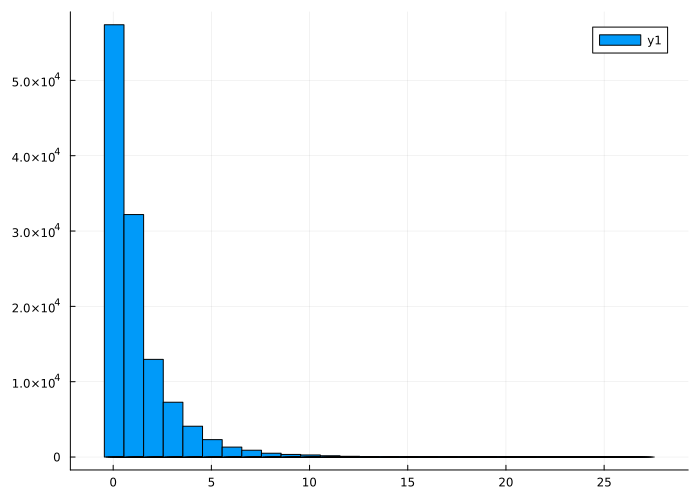

In [34]:
histogram(incident_events.reassignment_count,bar_width=1)

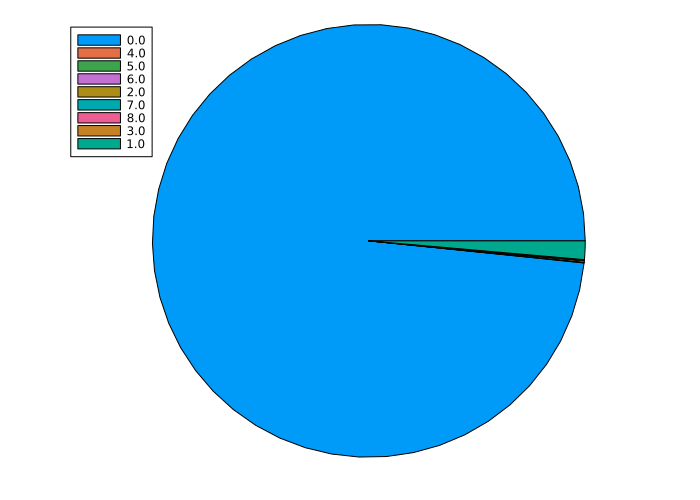

In [71]:
pie(countmap(incident_events.reopen_count))

In [57]:
reopen_count_no_0 = subset(incident_events, :reopen_count => x -> x .> 0).reopen_count;

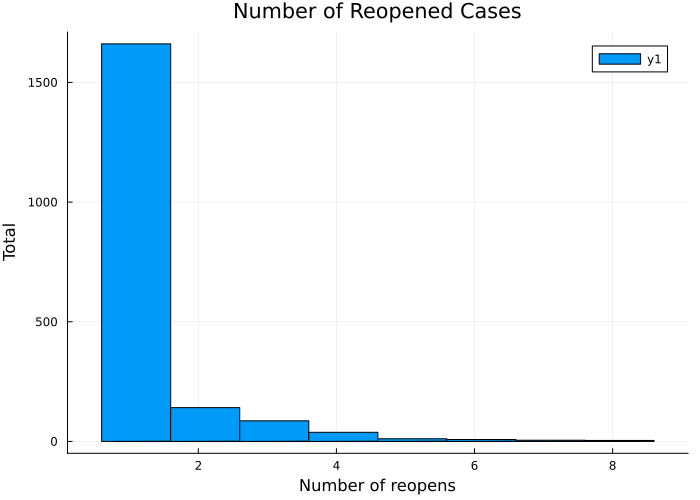

In [76]:
histogram(reopen_count_no_0,bar_width=1,title="Number of Reopened Cases", yaxis="Total", xaxis="Number of reopens")

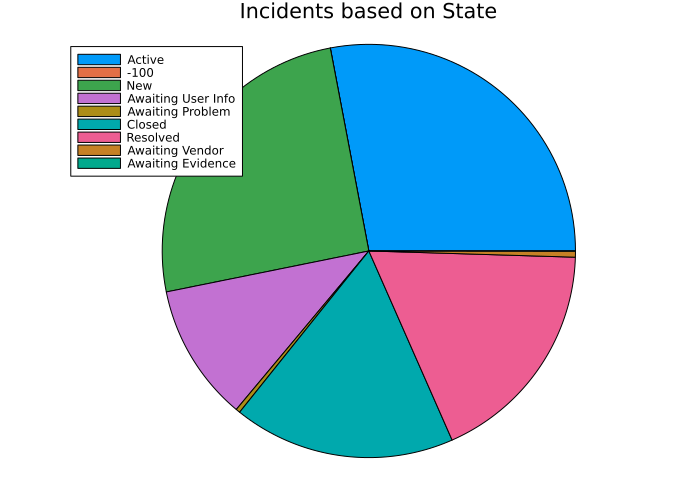

In [88]:
pie(countmap(incident_events.in, title=""cident_state), title="Incidents based on State")

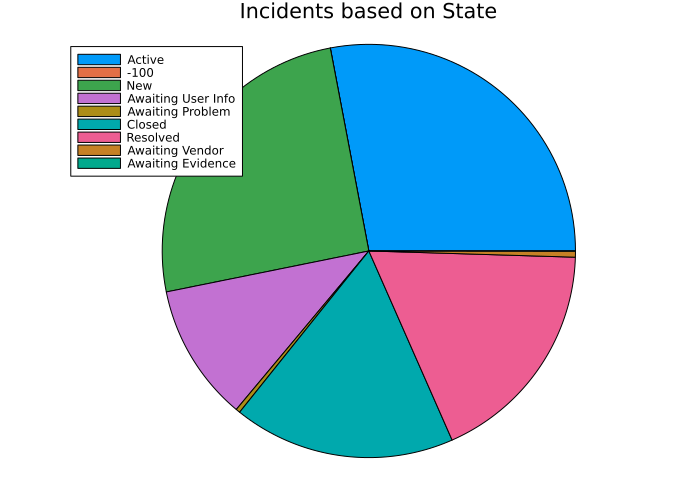

In [88]:
pie(countmap(incident_events.in, title=""cident_state), title="Incidents based on State")

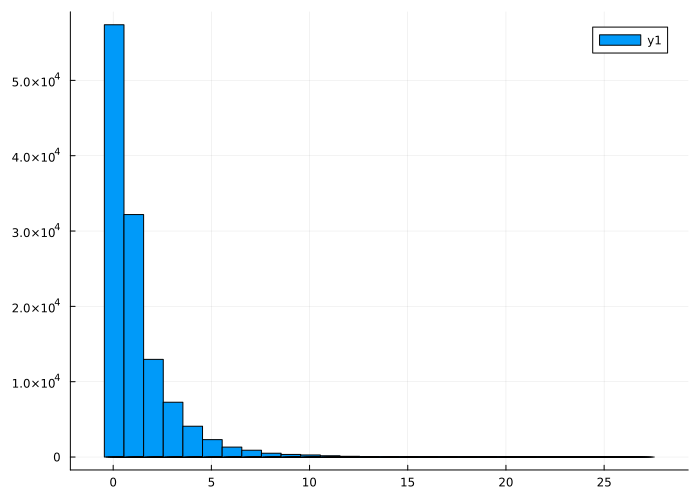

In [34]:
histogram(incident_events.reassignment_count,bar_width=1)

In [35]:
reassignment_count_map = countmap(incident_events.reassignment_count)

Dict{Int64, Int64} with 28 entries:
  5  => 2310
  16 => 13
  20 => 16
  12 => 100
  24 => 1
  8  => 506
  17 => 16
  1  => 32183
  19 => 8
  0  => 57377
  22 => 9
  6  => 1315
  23 => 2
  11 => 165
  9  => 341
  14 => 38
  3  => 7274
  7  => 900
  25 => 1
  4  => 4091
  13 => 57
  15 => 21
  2  => 12961
  10 => 272
  18 => 13
  ⋮  => ⋮

In [84]:
df = DataFrame(incident=String[], count=Int[], percentage=Float64[])
mapToDefPerc(incident_map, df, 119_998)
df

Row,incident,count,percentage
,String,Int64,Float64
1,Active,33582,27.985
2,-100,2,0.002
3,New,30229,25.191
4,Awaiting User Info,12884,10.737
5,Awaiting Problem,400,0.333
6,Closed,20825,17.354
7,Resolved,21500,17.917
8,Awaiting Vendor,557,0.464
9,Awaiting Evidence,19,0.016


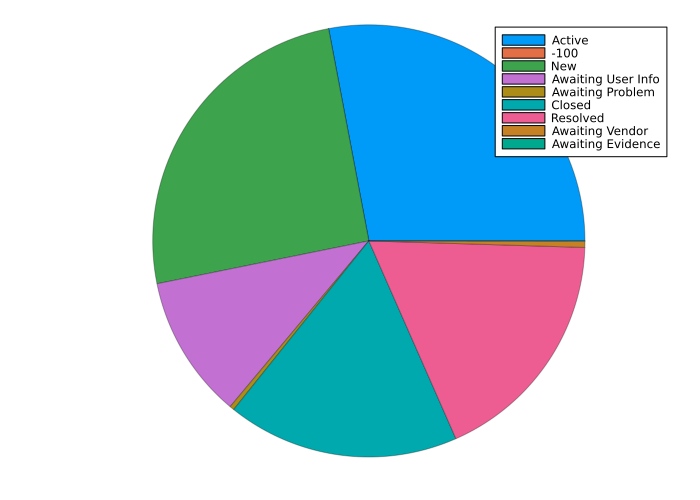

In [63]:
Plots.pie(df.incident, df.count, l=0.3)

In [31]:
Plotspie(df)

LoadError: MethodError: no method matching pie(::DataFrame)
[0mClosest candidates are:
[0m  pie([91m::AbstractVector[39m, [91m::AbstractVector{<:Union{Missing, Real}}[39m; selected, radius, center, roseType, legend, kwargs...) at /opt/julia/packages/ECharts/KoaxO/src/plots/pie.jl:35

In [14]:
combine(groupby(incident_events, [:reassignment_count]), nrow => :count)

Row,reassignment_count,count
,Int64,Int64
1,0,57377
2,1,32183
3,2,12961
4,3,7274
5,4,4091
6,5,2310
7,6,1315
8,7,900
9,8,506


In [10]:
impact_incidents = combine(groupby(incident_events, [:impact]), nrow => :count)

Row,impact,count
,String,Int64
1,2 - Medium,113691
2,1 - High,2889
3,3 - Low,3418


In [68]:
groupby(incident_events, [:impact])

Row,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
,String15,String31,Bool,Int64,Int64,Int64,Bool,String15,String15,String15,String15,String15,String15,String31,String7,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15,Bool,Bool,String15,String15,String15,String15,String15,String7,String15,String31,String31
1,INC0000045,New,true,0,0,0,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,true,0,0,2,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Resolved,true,0,0,3,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000045,Closed,false,0,0,4,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
5,INC0000047,New,true,0,0,0,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,true,1,0,1,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,true,1,0,2,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,true,1,0,3,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,true,1,0,4,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


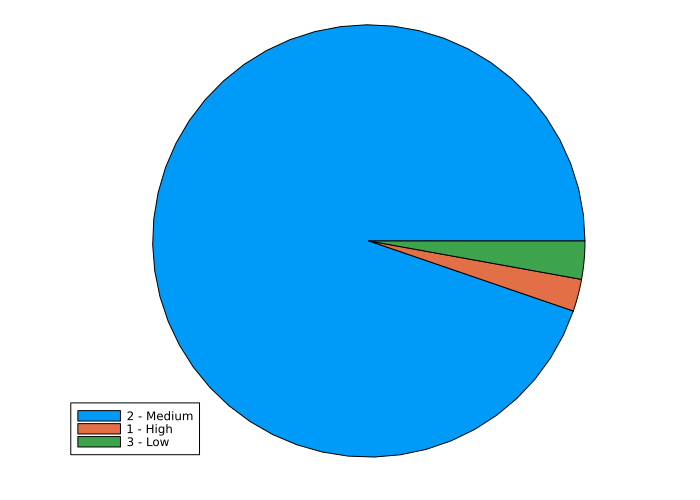

In [12]:
pie(impact_incidents[:, :impact], impact_incidents[:, :count])

In [9]:
urgency_incidents = combine(groupby(incident_events, [:urgency]), nrow => :count)

Row,urgency,count
,String,Int64
1,2 - Medium,113550
2,3 - Low,3145
3,1 - High,3303


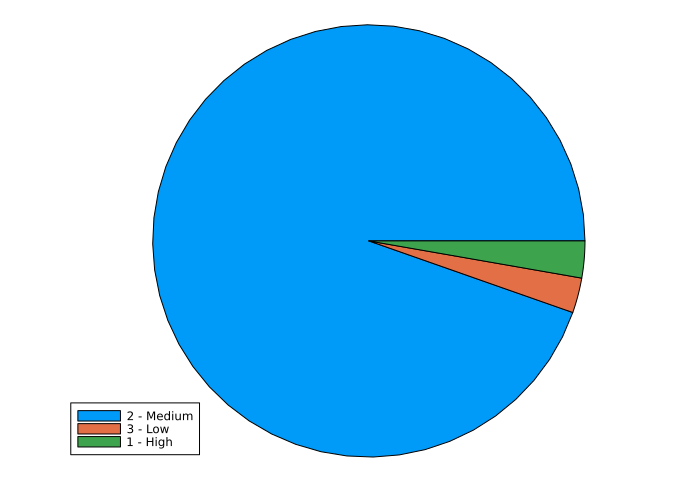

In [13]:
pie(urgency_incidents[:, :urgency], urgency_incidents[:, :count])

In [6]:
histogram(sampled_incidents[:, :impact])

LoadError: MethodError: no method matching isfinite(::String)
[0mClosest candidates are:
[0m  isfinite([91m::Integer[39m) at float.jl:501
[0m  isfinite([91m::Complex[39m) at complex.jl:146
[0m  isfinite([91m::AbstractIrrational[39m) at irrationals.jl:141
[0m  ...

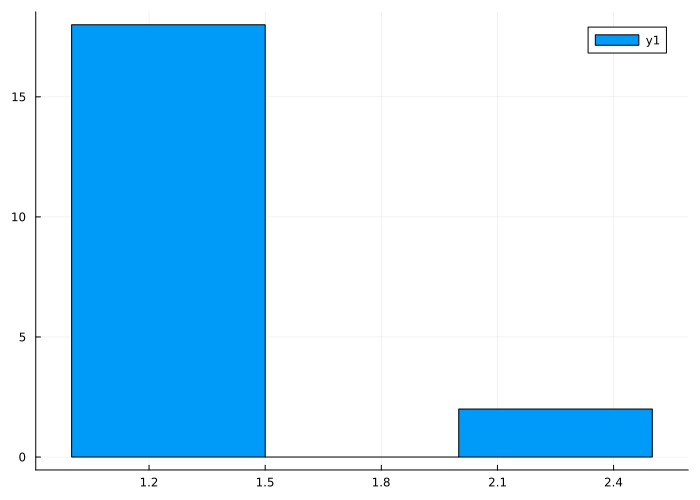

In [62]:
@df df groupedhist(:urgency, bar_position = :stack)

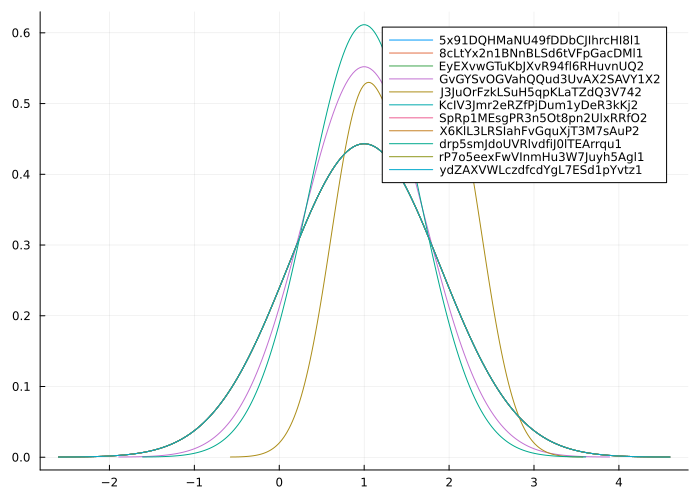

In [63]:
@df df density(:urgency, group=(:uid))